# Import Libraries

In [1]:
# For Dataset loading and preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# For train test splitting
from sklearn.model_selection import train_test_split

# For Data-Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, accuracy_score

# Loading Dataset

In [2]:
dataset = pd.read_csv('cicddos2019_dataset.csv')
dataset.head()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


# Statistical Analysis

In [3]:
dataset.describe()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,431371.000000,431371.000000,4.313710e+05,431371.000000,431371.000000,4.313710e+05,4.313710e+05,431371.000000,431371.000000,431371.000000,...,431371.000000,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05
mean,126835.311055,13.948694,8.404856e+06,24.139117,2.472021,9.416956e+03,1.632896e+03,357.483674,294.721646,324.915327,...,21.893124,-2.315406e+07,3.370905e+04,2.563697e+04,6.757181e+04,1.868363e+04,2.449924e+06,4.983262e+05,2.971142e+06,1.993859e+06
std,87249.615423,4.966712,2.126596e+07,195.888896,56.370208,3.445253e+04,1.064056e+05,320.025929,273.298705,268.577313,...,54.559772,1.551755e+08,3.223119e+05,2.226543e+05,5.183739e+05,2.832011e+05,7.914010e+06,2.005164e+06,9.045327e+06,7.245561e+06
min,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53921.000000,6.000000,7.870000e+02,4.000000,0.000000,7.800000e+01,0.000000e+00,37.000000,6.000000,32.000000,...,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,107842.000000,17.000000,4.480400e+04,4.000000,0.000000,2.064000e+03,0.000000e+00,440.000000,330.000000,428.000000,...,3.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,198357.500000,17.000000,3.002508e+06,16.000000,2.000000,5.160000e+03,0.000000e+00,516.000000,516.000000,516.000000,...,13.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,306200.000000,17.000000,1.199987e+08,86666.000000,31700.000000,1.526642e+07,5.842950e+07,32120.000000,2131.000000,3015.290500,...,18766.000000,6.724045e+07,4.050800e+07,2.135244e+07,4.553668e+07,4.050800e+07,1.192194e+08,6.961402e+07,1.192194e+08,1.192194e+08


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 80 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                431371 non-null  int64  
 1   Protocol                  431371 non-null  int64  
 2   Flow Duration             431371 non-null  int64  
 3   Total Fwd Packets         431371 non-null  int64  
 4   Total Backward Packets    431371 non-null  int64  
 5   Fwd Packets Length Total  431371 non-null  float64
 6   Bwd Packets Length Total  431371 non-null  float64
 7   Fwd Packet Length Max     431371 non-null  float64
 8   Fwd Packet Length Min     431371 non-null  float64
 9   Fwd Packet Length Mean    431371 non-null  float64
 10  Fwd Packet Length Std     431371 non-null  float64
 11  Bwd Packet Length Max     431371 non-null  float64
 12  Bwd Packet Length Min     431371 non-null  float64
 13  Bwd Packet Length Mean    431371 non-null  f

In [5]:
# Applying the statistical analysis
dataset.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
dataset.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,35.088460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,22.516660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,34.063667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [7]:
# calculating null values
dataset.isna().sum() 

Protocol                    0
Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
                           ..
Idle Std                    0
Idle Max                    0
Idle Min                    0
Label                       0
Class                       0
Length: 79, dtype: int64

# EDA (Exploratory Data Analysis)

<AxesSubplot:>

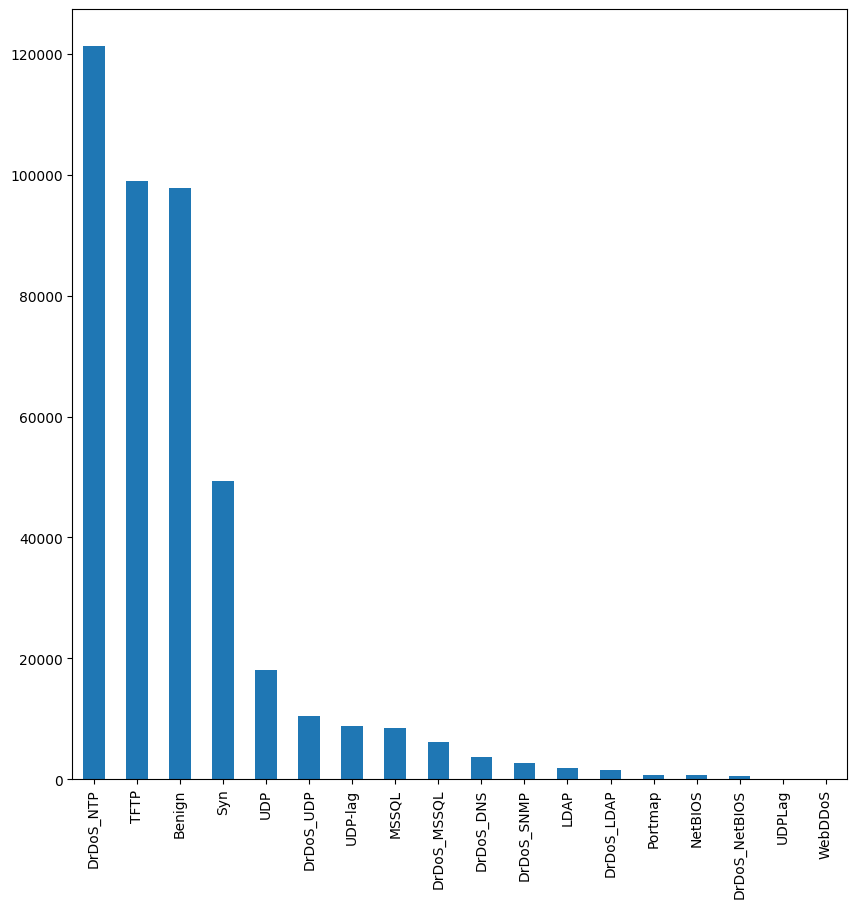

In [8]:
dataset['Label'].value_counts().plot(kind = 'bar', figsize = (10,10))

# Data Preprocessing

In [9]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Assuming 'Class' and 'Label' are the categorical columns that need to be label encoded
columns_to_encode = ['Class', 'Label']

for column in columns_to_encode:
    
    # Fit label encoder and transform the specified column
    dataset[column] = label_encoder.fit_transform(dataset[column])

### Feature selection for Visualisation

As theri are 78 features So we need to take the important 30 features that are mostly coorelating with the target column rather then using all the features so that it should reduce the model performance complaxity

In [10]:
target_column = 'Label'  

# Calculating the absolute correlation of each feature with the target variable
correlation = dataset.corr().abs()[target_column].sort_values(ascending=False)

# Selecting the top N most important features (e.g., top 10 features)
N = 30  # Change this number to select a different number of top features
important_columns = correlation.index[1:N+1]  # Exclude the target column and select top N features

# Display the most important columns
print("Top", N, "Important Columns based on Correlation:")
print(important_columns)

Top 30 Important Columns based on Correlation:
Index(['Class', 'Flow IAT Mean', 'Down/Up Ratio', 'URG Flag Count',
       'Fwd IAT Mean', 'Flow IAT Std', 'Bwd Packet Length Min',
       'Packet Length Min', 'Fwd IAT Std', 'Fwd Packet Length Min',
       'CWE Flag Count', 'Packet Length Std', 'Bwd Packet Length Mean',
       'Avg Bwd Segment Size', 'Fwd Packet Length Mean',
       'Avg Fwd Segment Size', 'Fwd Packet Length Std', 'Fwd PSH Flags',
       'RST Flag Count', 'Avg Packet Size', 'Bwd Packet Length Std',
       'Bwd Packet Length Max', 'Packet Length Mean', 'ACK Flag Count',
       'Init Bwd Win Bytes', 'Idle Std', 'Fwd Act Data Packets', 'Fwd IAT Max',
       'Flow IAT Max', 'Init Fwd Win Bytes'],
      dtype='object')


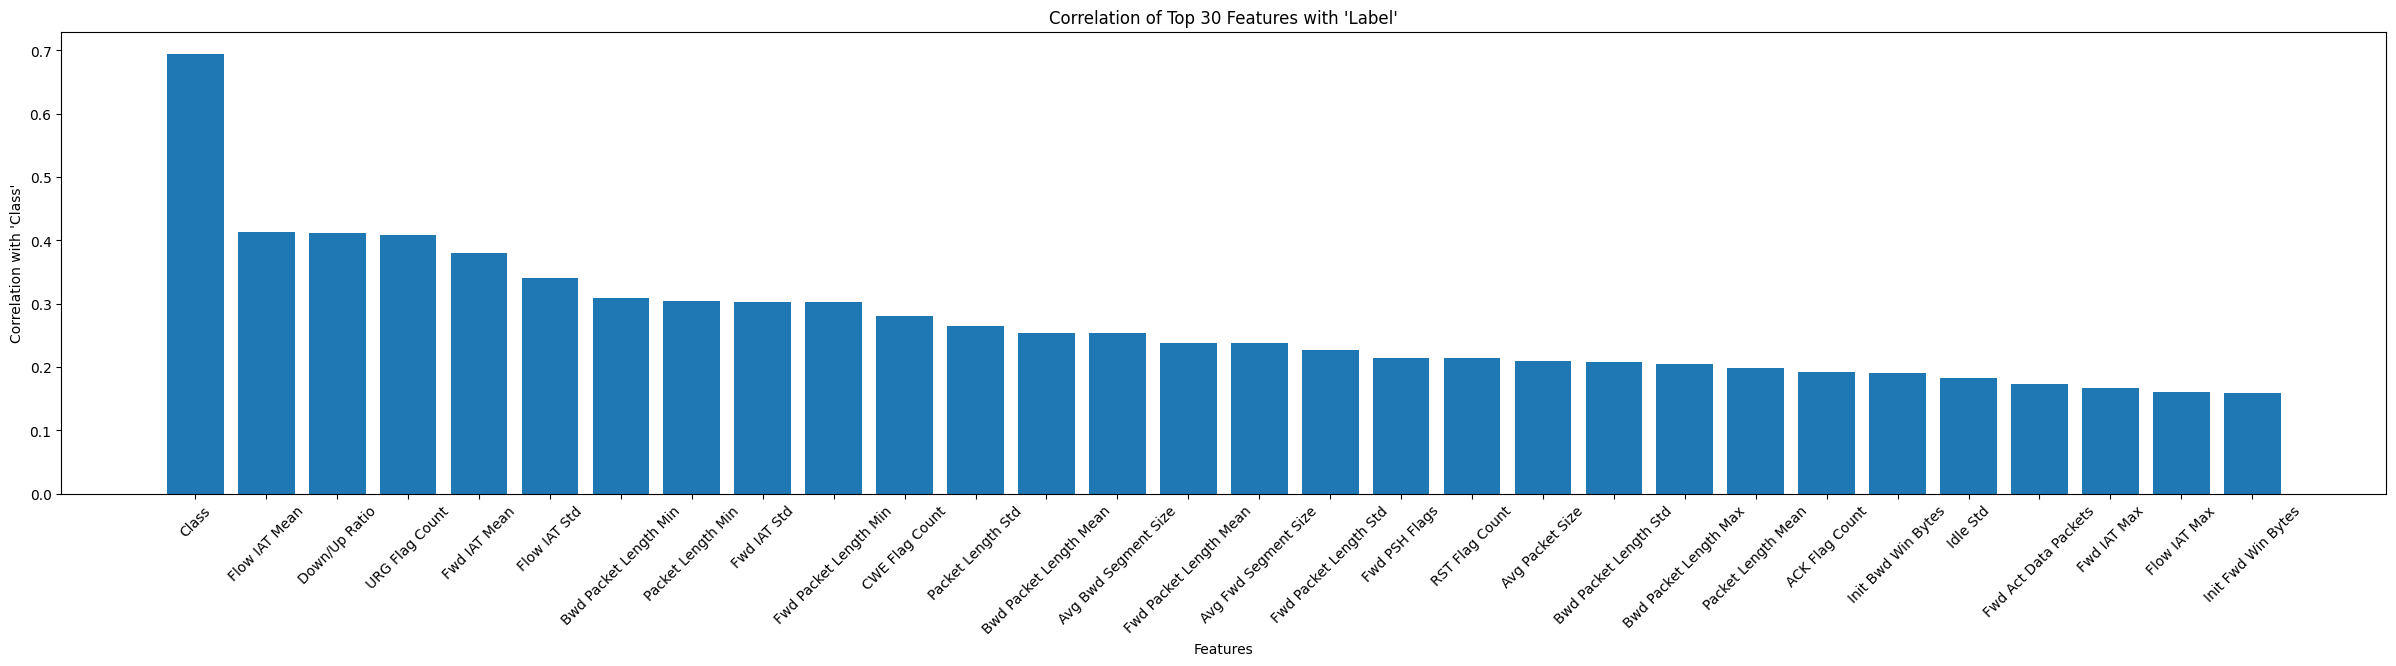

In [11]:
# Plot the correlation values of the top N important columns
plt.figure(figsize=(30, 6))
plt.bar(important_columns, correlation[1:N+1])
plt.xlabel("Features")
plt.ylabel("Correlation with 'Class'")
plt.title("Correlation of Top {} Features with 'Label'".format(N))
plt.xticks(rotation=45)
plt.show()

In [12]:
X = dataset[important_columns] # Select all important columns except the second last one as the data
y = dataset.iloc[:,-2] # Select the second last column as the target variable

In [13]:
# Spliting the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (345096, 30)
y_train: (345096,)
X_test: (86275, 30)
y_test: (86275,)


In [14]:
# Standardize/normalize the data (optional but often helpful)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applying the Classifier Models

In [16]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    plt.figure(figsize=(10,10))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

========== Decision tree ==========

Accuracy on validation set: 0.9277

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19619
           1       0.52      0.43      0.47       748
           2       0.29      0.16      0.21       263
           3       0.41      0.49      0.45      1215
           4       1.00      1.00      1.00     24300
           5       0.20      0.17      0.19       112
           6       0.62      0.66      0.64       557
           7       0.35      0.36      0.35      2085
           8       0.40      0.55      0.47       375
           9       0.55      0.51      0.53      1726
          10       0.34      0.49      0.40       112
          11       0.43      0.28      0.34       124
          12       0.99      0.99      0.99      9847
          13       1.00      1.00      1.00     19869
          14       0.59      0.57      0.58      3545
          15       0.74      0.74   

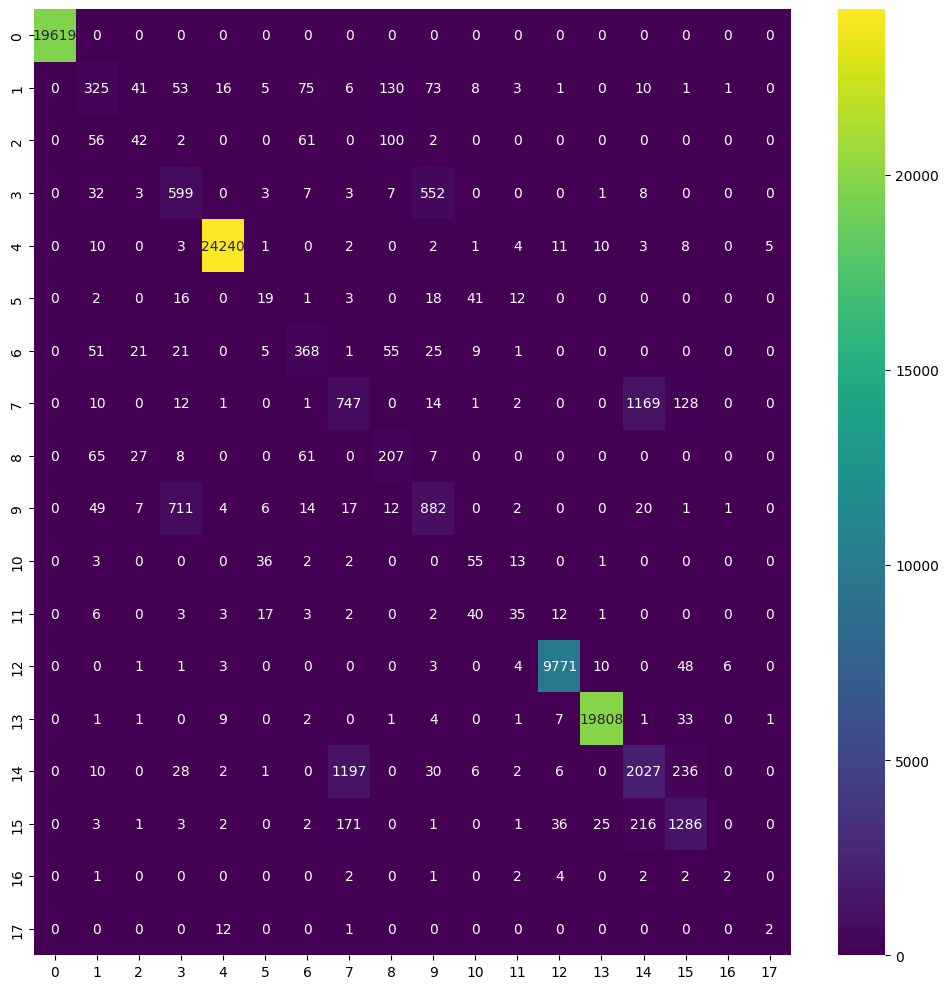

========== Random Forest ==========

Accuracy on validation set: 0.9304

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19619
           1       0.59      0.41      0.49       748
           2       0.30      0.14      0.19       263
           3       0.41      0.39      0.40      1215
           4       1.00      1.00      1.00     24300
           5       0.25      0.14      0.18       112
           6       0.61      0.68      0.64       557
           7       0.35      0.31      0.33      2085
           8       0.39      0.56      0.46       375
           9       0.53      0.60      0.57      1726
          10       0.34      0.48      0.40       112
          11       0.45      0.33      0.38       124
          12       0.99      0.99      0.99      9847
          13       1.00      1.00      1.00     19869
          14       0.58      0.65      0.62      3545
          15       0.81      0.74   

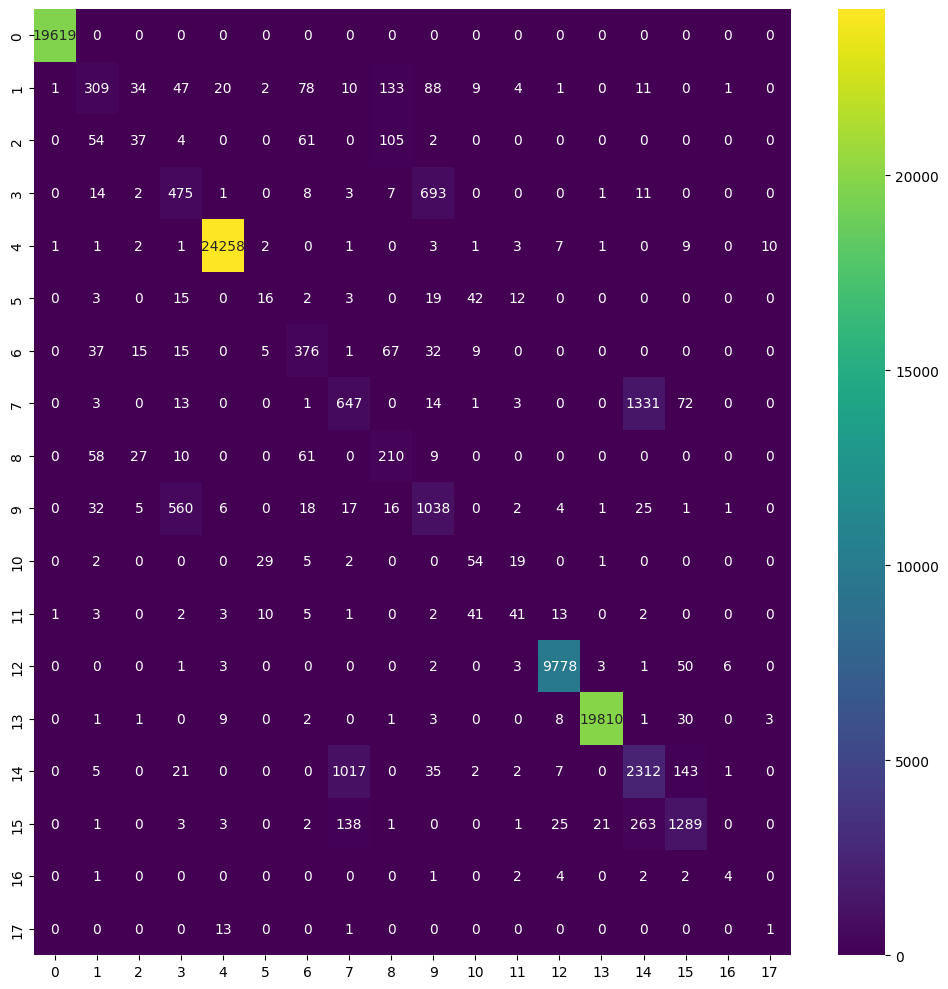

========== Naive Bayes ==========

Accuracy on validation set: 0.4660

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19619
           1       0.02      0.44      0.03       748
           2       0.00      0.00      0.00       263
           3       0.00      0.00      0.00      1215
           4       0.98      0.16      0.27     24300
           5       0.00      0.00      0.00       112
           6       0.32      0.96      0.48       557
           7       0.00      0.00      0.00      2085
           8       0.50      0.00      0.01       375
           9       0.00      0.00      0.00      1726
          10       0.00      0.00      0.00       112
          11       0.18      0.02      0.04       124
          12       0.89      0.82      0.85      9847
          13       1.00      0.22      0.36     19869
          14       0.29      0.93      0.45      3545
          15       0.59      0.05     

c:\users\abdul\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\abdul\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\abdul\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

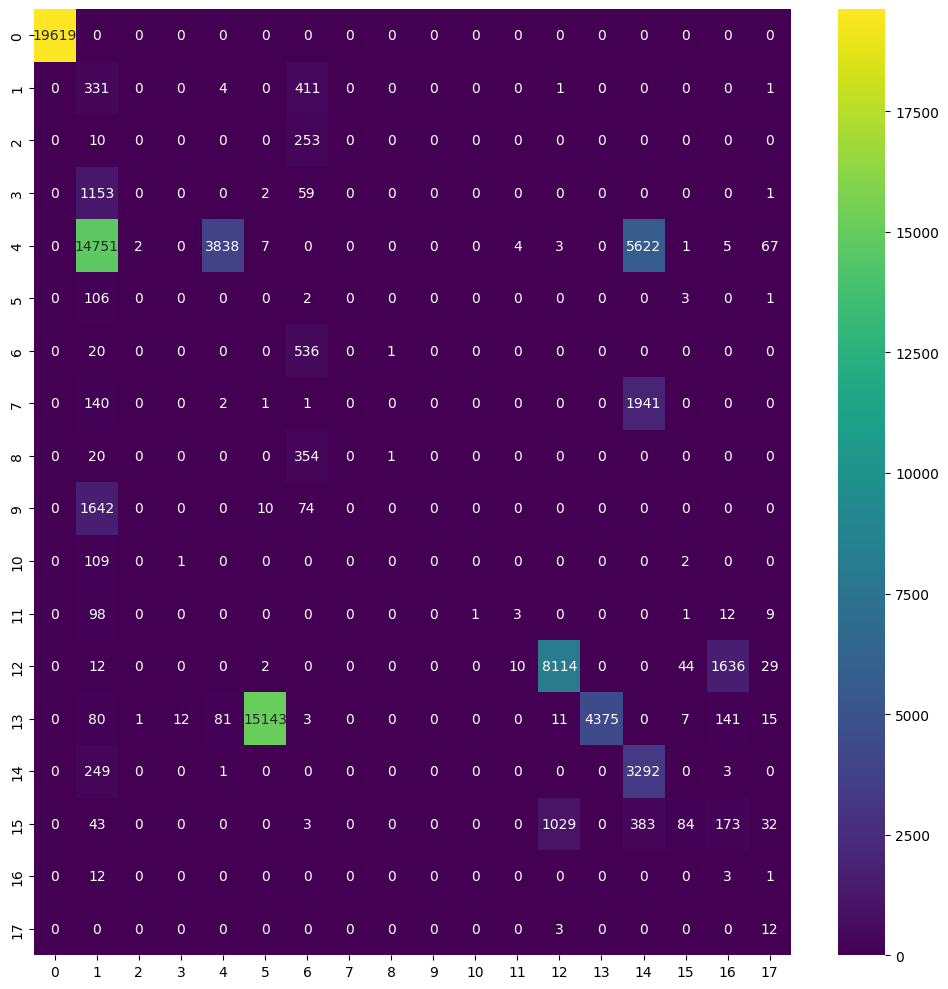

c:\users\abdul\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# For Decision tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)
result_dt = modelEvaluation(pred_dt, y_test, 'Decision tree')

# For Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
result_rf = modelEvaluation(pred_rf, y_test, 'Random Forest')

# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
pred_nb = nb_model.predict(X_test)
results_nb = modelEvaluation(pred_nb, y_test, 'Naive Bayes')

# Comparing the Model performance

In [18]:
from tabulate import tabulate
# showing all models result in the comparison of the metrics 
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'Decision tree' : result_dt,
    'Random Forest' : result_rf,
    'Naive Bayes' : results_nb, 
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))

+-----------+-----------------+-----------------+---------------+
| Metrics   |   Decision tree |   Random Forest |   Naive Bayes |
|-----------+-----------------+-----------------+---------------|
| accuracy  |        0.927662 |        0.930443 |      0.466045 |
| precision |        0.548376 |        0.554174 |      0.323937 |
| recall    |        0.536951 |        0.541228 |      0.311002 |
| f1-score  |        0.537326 |        0.541746 |      0.206259 |
+-----------+-----------------+-----------------+---------------+


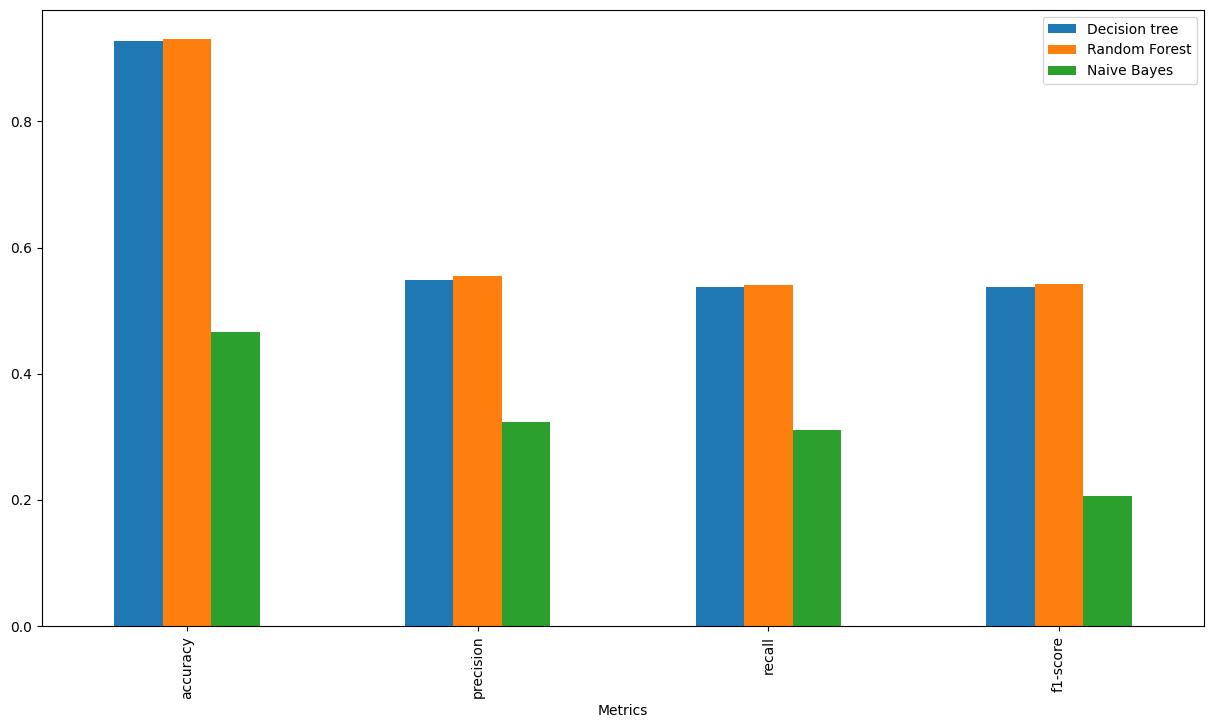

In [19]:
# Following are the metrics for the evaluation comarison
metrics_df.plot(kind='bar', figsize=(15,8))
plt.show()

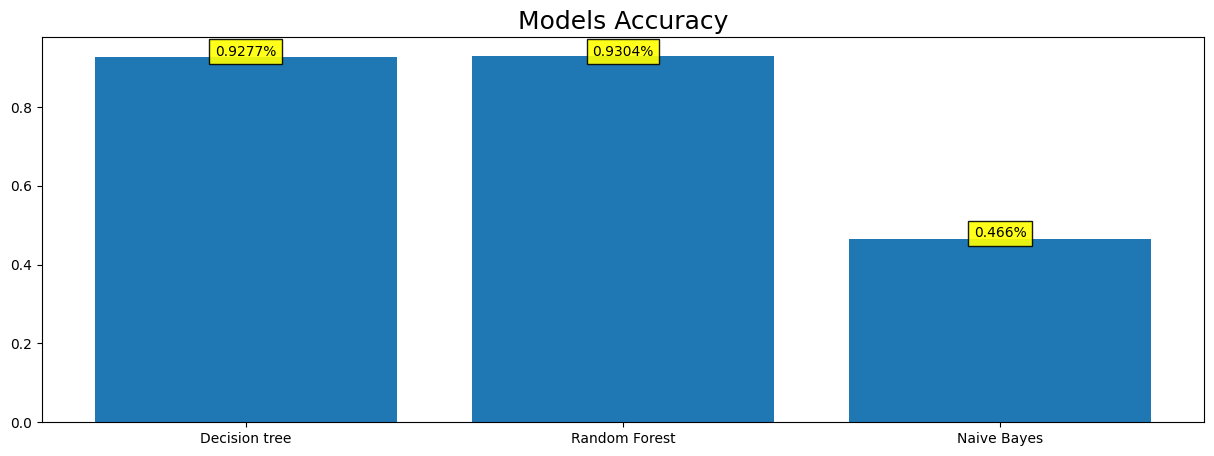

In [20]:
# Here are we Displaying the Accuracy Comparison between two graphs
models_acc = metrics_df.iloc[0].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],2),f"{round(acc[i],4)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()

**Results:**<br/>

So that the best model after comparing the performance of the model is the Random Forest Classifier that has achieved the accuracy of 93% So that we will improve its performance using the hyperparameter tuining in GRID Search. 

# Applying the Hyper parameter Tuning over the dataset for the tuning of the best model

**Applying the Grid Search for the model improvement**

In [21]:
# Following are the parameters that are used for the GRid Search Application
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [22]:
# Here are we applying the GRaid search over the best model 
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10]})

In [23]:
# Following are the hyperparameters and the accuracy of the Grid Search model 
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best accuracy score:  0.93559


In [24]:
# Here are the best parameters of the Random forest trained model
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=4,
                       min_samples_split=10)

========== Decision tree ==========

Accuracy on validation set: 0.9375


c:\users\abdul\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\abdul\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\abdul\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19619
           1       0.66      0.44      0.53       748
           2       0.57      0.18      0.27       263
           3       0.38      0.29      0.33      1215
           4       1.00      1.00      1.00     24300
           5       0.19      0.05      0.08       112
           6       0.61      0.78      0.69       557
           7       0.35      0.07      0.12      2085
           8       0.43      0.58      0.49       375
           9       0.54      0.69      0.61      1726
          10       0.43      0.69      0.53       112
          11       0.53      0.36      0.43       124
          12       1.00      0.99      0.99      9847
          13       1.00      1.00      1.00     19869
          14       0.58      0.91      0.71      3545
          15       0.92      0.75      0.82      1747
          16       0.50      0.25      0.33        16


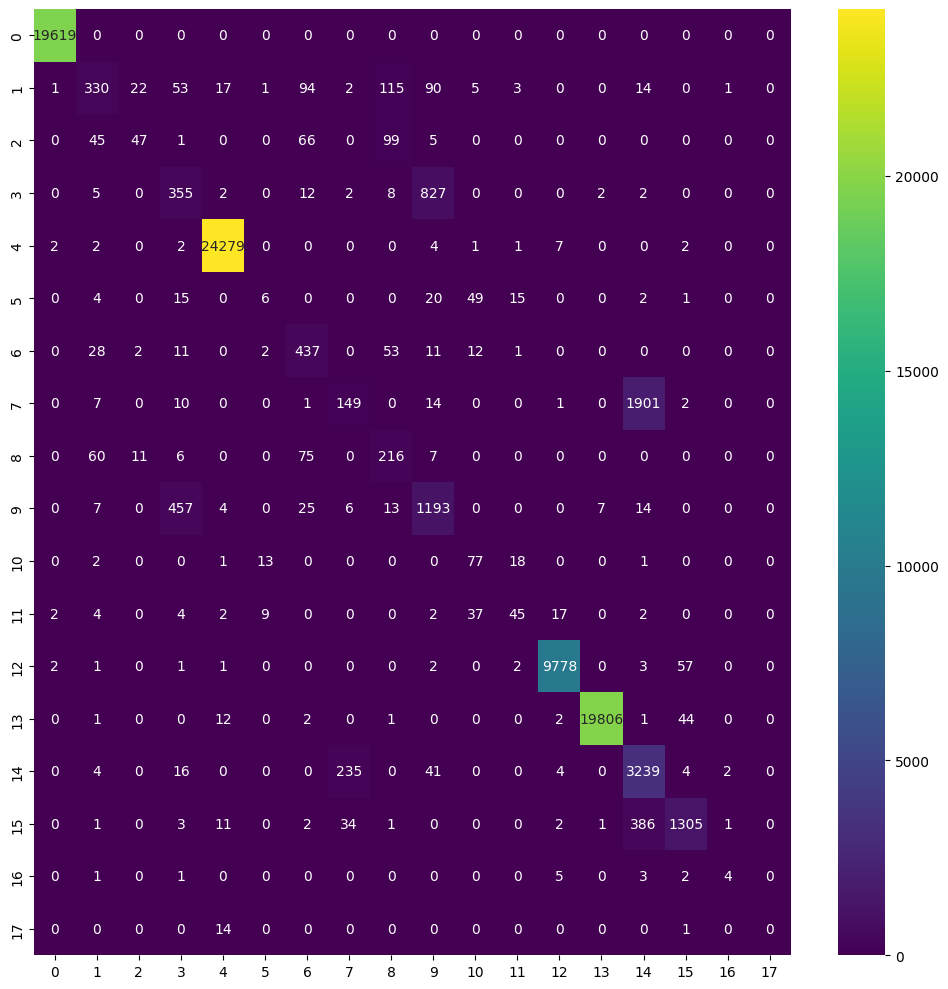

c:\users\abdul\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# Here is the results from the Random Forest improved model
pred_dt = best_dt_model.predict(X_test)
result_dt = modelEvaluation(pred_dt, y_test, 'Decision tree')

# Note:

Here we can see that the model of the Redom Forest Classifier after tuning has reached to 94% that is the highest achieveable accuracy score of the whole dataset in which we can see that the model have classified the first and fifth class very well then the other classes.

# Detail Observations

# Machine Learning Model Performance Report on Intrusion Detection Dataset

## Introduction
For computer networks to be secure, intrusion detection systems (IDS) are essential. Because machine learning (ML) models can learn from data and recognize patterns that point to malicious activity, they have gained popularity in the detection of these types of intrusionsSeveral machine learning models are evaluated in this report using a dataset that has 79 feature columns and is intended to be used for intrusion type prediction.

## Dataset

The dataset consists of network traffic features extracted to classify the type of intrusion. With 79 features, this dataset presents a complex multi-dimensional space where machine learning models can attempt to find patterns that distinguish between normal behavior and potential intrusions.
## Initial Model Performance

Three different machine learning models were evaluated: Decision Tree, Random Forest, and Naive Bayes. Each model was assessed based on standard classification metrics: accuracy, precision, recall, and F1-score. The initial results were as follows:

- **Decision Tree:**
  - Accuracy: 92.766%
  - Precision: 54.8376%
  - Recall: 53.6951%
  - F1-score: 53.7326%

- **Random Forest:**
  - Accuracy: 93.0443%
  - Precision: 55.4174%
  - Recall: 54.1228%
  - F1-score: 54.1746%

- **Naive Bayes:**
  - Accuracy: 46.6045%
  - Precision: 32.3937%
  - Recall: 31.1002%

  - F1-score: 20.6259%

The Random Forest model outperformed the Decision Tree and Naive Bayes models across all metrics, indicating its superior performance for this particular dataset.

## Model Optimization

To further enhance the performance of the Random Forest model, a Grid Search was conducted with 5-fold cross-validation. The hyperparameters tuned included the criterion, max depth, min samples leaf, and min samples split. The search was exhaustive across the following parameter grid:

- Criterion: ['gini', 'entropy']
- Max Depth: [30, 40]
- Min Samples Leaf: [2, 4]
- Min Samples Split: [5, 10]

## Results of Grid Search

The Grid Search identified the following optimal hyperparameters for the Random Forest model:

- Criterion: 'entropy'
- Max Depth: 30
- Min Samples Leaf: 4
- Min Samples Split: 10

With these parameters, the Random Forest model achieved an accuracy of 93.559%. Post Grid Search optimization, the overall accuracy of the model improved to 94%, indicating a significant enhancement over the initial performance.

## Conclusion

The application of machine learning to the intrusion detection dataset has yielded promising results, with the optimized Random Forest model showing a high level of accuracy. These findings suggest that with careful tuning of hyperparameters, Random Forest models are well-suited for IDS applications. Further research could explore the impact of additional feature engineering, the application of more complex models, and the use of larger datasets for training.

---